In [1]:
import opendssdirect as dss
import matplotlib.pyplot as plt


import pandas as pd

## Store an internally consistent set of OpenDSS model files in a directory, let's say opendss-model-files. Compiling the master file in opendssdirect.py should work.

In [2]:
masterfile = "/Users/svijaysh/8500-feeder/opendss-model-files/Master.dss"
str_cmd = "Compile {}".format(masterfile)
dss.run_command(str_cmd)

'Unknown parameter "actual" (value "mult") for object "LoadShape.com_kvar_41805_pu"'

## Copy and modify the attached time_series_8500.json file. You should at most only have to edit opendss_model_file.

## Copy the attached exports.toml. You may be interested in editing it in later runs.

disco config-generic-models time-series time_series_8500.json --config-file time_series_config.json 
    --exports-filename exports.toml 
    --export-data-tables 
    --store-all-time-points 
    --store-per-element-data 
    --thermal-metrics=true 
    --voltage-metrics=true 
    --feeder-losses=true

In [3]:
# import json
# import matplotlib.pyplot as plt

# # Load data from the JSON file
# file_path = "/Users/svijaysh/8500-feeder/output/job-outputs/base_8500/pydss_project/project/Reports/voltage_metrics.json"
# with open(file_path, "r") as file:
#     data = json.load(file)

# # Extract "summary" data for ansi_a and ansi_b
# summary_ansi_a = data["scenarios"]["pf1"]["primaries"]["summary"]
# summary_ansi_b = data["scenarios"]["pf1"]["secondaries"]["summary"]

# # Extract keys and values for plotting
# labels = list(summary_ansi_a.keys())
# values_ansi_a = list(summary_ansi_a.values())
# values_ansi_b = list(summary_ansi_b.values())

# # Plotting a side-by-side bar chart for ansi_a and ansi_b
# fig, ax = plt.subplots()
# width = 0.35  # Width of the bars

# # Position for ansi_a and ansi_b bars
# x = range(len(labels))
# ax.bar(x, values_ansi_a, width, label='ANSI A')
# ax.bar([i + width for i in x], values_ansi_b, width, label='ANSI B')

# # Customize the plot as needed
# ax.set_ylabel("Metric Values")
# ax.set_title("Summary Metrics Visualization for ANSI A and B")
# ax.set_xticks([i + width/2 for i in x])
# ax.set_xticklabels(labels)
# ax.legend()

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha="right")

# # Show the plot
# plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/svijaysh/8500-feeder/output/job-outputs/base_8500/pydss_project/project/Reports/voltage_metrics.json'

In [ ]:
# # Save extracted data to a different folder
# output_folder = "/Users/svijaysh/8500-feeder/summary_diff_loads/"
# output_file_path = f"{output_folder}load_08.json"

# # Create the output folder if it doesn't exist
# import os
# os.makedirs(output_folder, exist_ok=True)

# # Save the extracted data to the output file
# with open(output_file_path, "w") as output_file:
#     json.dump(data, output_file)


# Comparison (Min and Max voltages) for 0, MA, Smart DS example

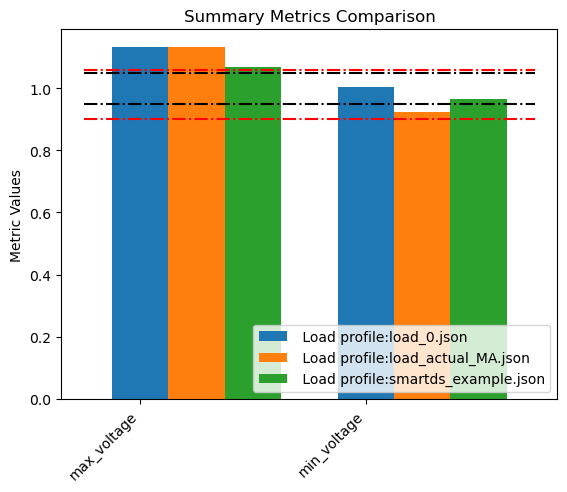

In [18]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# Function to extract specific keys from summary data for ANSI A and B
def extract_specific_keys(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)

    # Extract specific keys from "summary" data for ANSI A and B
    summary_ansi_a = {key: data["scenarios"]["pf1"]["primaries"]["summary"].get(key, None) for key in specific_keys}
    summary_ansi_b = {key: data["scenarios"]["pf1"]["secondaries"]["summary"].get(key, None) for key in specific_keys}

    return summary_ansi_a, summary_ansi_b

# List of your JSON files
path = "/Users/svijaysh/8500-feeder/summary_diff_loads/"
json_files = [f"{path}load_0.json", f"{path}load_actual_MA.json", f"{path}smartds_example.json"]
json_files_ = [f"load_0.json", f"load_actual_MA.json", f"smartds_example.json"]

# Specific keys of interest
specific_keys = [
    'max_voltage',
    'min_voltage',
    # 'num_nodes_always_inside_ansi_a',
    # 'num_nodes_any_outside_ansi_a_always_inside_ansi_b',
    # 'num_nodes_any_outside_ansi_b',
    # 'num_time_points_with_ansi_b_violations'
]

# Extract specific keys for ANSI A and B from each file
summaries_ansi_a = []
summaries_ansi_b = []

for file_path in json_files:
    summary_a, summary_b = extract_specific_keys(file_path)
    summaries_ansi_a.append(summary_a)
    summaries_ansi_b.append(summary_b)

# Plotting a side-by-side bar chart for specific keys of interest
fig, ax = plt.subplots()
width = 0.25  # Width of the bars

# Extract keys for plotting
labels = specific_keys

# Position for ANSI A and B bars
x = range(len(labels))
for i, (summary_a, summary_b) in enumerate(zip(summaries_ansi_a, summaries_ansi_b)):
    #ax.bar([pos + i * width for pos in x], list(summary_a.values()), width, label=f'ANSI A - File {i+1}')
    ax.bar([pos + (i + 1) * width for pos in x], list(summary_b.values()), width, label=f' Load profile:{json_files_[i]}')

# Customize the plot as needed
ax.plot(0.95*np.ones(3), '-.', color = 'k')
ax.plot(1.05*np.ones(3), '-.', color = 'k')
ax.plot(0.9*np.ones(3), '-.', color = 'r')
ax.plot(1.058*np.ones(3), '-.', color = 'r')

ax.set_ylabel("Metric Values")
ax.set_title("Summary Metrics Comparison")
ax.set_xticks([pos +1 * width for pos in x])
ax.set_xticklabels(labels)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.legend(loc = "lower right")
# Show the plot
plt.show()


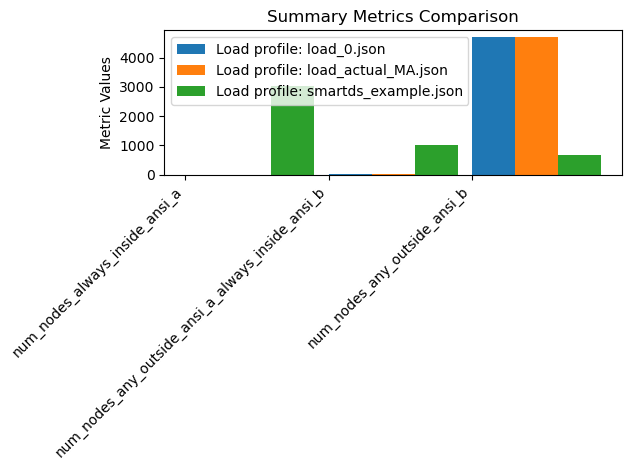

In [19]:
import json
import os
import matplotlib.pyplot as plt

# Function to extract specific keys from summary data for ANSI A and B
def extract_specific_keys(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)

    # Extract specific keys from "summary" data for ANSI A and B
    summary_ansi_a = {key: data["scenarios"]["pf1"]["primaries"]["summary"].get(key, None) for key in specific_keys}
    summary_ansi_b = {key: data["scenarios"]["pf1"]["secondaries"]["summary"].get(key, None) for key in specific_keys}

    return summary_ansi_a, summary_ansi_b

# List of your JSON files
path = "/Users/svijaysh/8500-feeder/summary_diff_loads/"
json_files = [f"{path}load_0.json", f"{path}load_actual_MA.json", f"{path}smartds_example.json"]
json_files_ = [f"load_0.json", f"load_actual_MA.json", f"smartds_example.json"]

# Specific keys of interest
specific_keys = [
    'num_nodes_always_inside_ansi_a',
    'num_nodes_any_outside_ansi_a_always_inside_ansi_b',
    'num_nodes_any_outside_ansi_b',
]

# Extract specific keys for ANSI A and B from each file
summaries_ansi_a = []
summaries_ansi_b = []

for file_path in json_files:
    summary_a, summary_b = extract_specific_keys(file_path)
    summaries_ansi_a.append(summary_a)
    summaries_ansi_b.append(summary_b)

# Plotting a side-by-side bar chart for specific keys of interest
fig, ax = plt.subplots()
width = 0.3  # Width of the bars

# Extract keys for plotting
labels = specific_keys

# Position for ANSI A and B bars
x = range(len(labels))
for i, (summary_a, summary_b) in enumerate(zip(summaries_ansi_a, summaries_ansi_b)):
    ax.bar([pos + (i + 1) * width for pos in x], list(summary_b.values()), width, label=f'Load profile: {json_files_[i]}')

# Customize the plot as needed
ax.set_ylabel("Metric Values")
ax.set_title("Summary Metrics Comparison")
ax.set_xticks([pos + 0.5 * width for pos in x])
ax.set_xticklabels(labels)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()




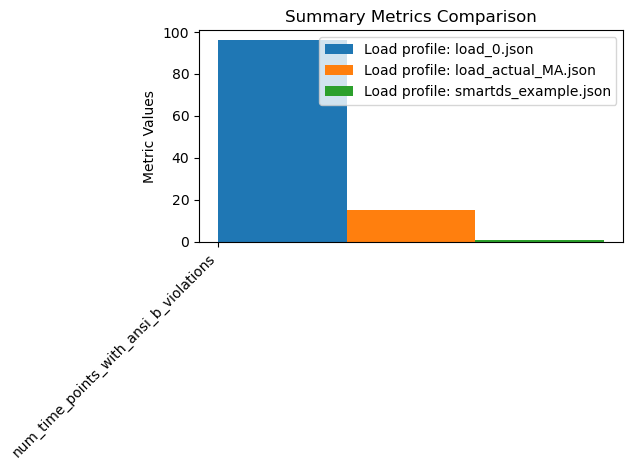

In [24]:
import json
import os
import matplotlib.pyplot as plt

# Function to extract specific keys from summary data for ANSI A and B
def extract_specific_keys(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)

    # Extract specific keys from "summary" data for ANSI A and B
    summary_ansi_a = {key: data["scenarios"]["pf1"]["primaries"]["summary"].get(key, None) for key in specific_keys}
    summary_ansi_b = {key: data["scenarios"]["pf1"]["secondaries"]["summary"].get(key, None) for key in specific_keys}

    return summary_ansi_a, summary_ansi_b

# List of your JSON files
path = "/Users/svijaysh/8500-feeder/summary_diff_loads/"
json_files = [f"{path}load_0.json", f"{path}load_actual_MA.json", f"{path}smartds_example.json"]
json_files_ = [f"load_0.json", f"load_actual_MA.json", f"smartds_example.json"]

# Specific keys of interest
specific_keys = [
   'num_time_points_with_ansi_b_violations'
]

# Extract specific keys for ANSI A and B from each file
summaries_ansi_a = []
summaries_ansi_b = []

for file_path in json_files:
    summary_a, summary_b = extract_specific_keys(file_path)
    summaries_ansi_a.append(summary_a)
    summaries_ansi_b.append(summary_b)

# Plotting a side-by-side bar chart for specific keys of interest
fig, ax = plt.subplots()
width = 0.3  # Width of the bars

# Extract keys for plotting
labels = specific_keys

# Position for ANSI A and B bars
x = range(len(labels))
for i, (summary_a, summary_b) in enumerate(zip(summaries_ansi_a, summaries_ansi_b)):
    ax.bar([pos + (i + 1) * width for pos in x], list(summary_b.values()), width, label=f'Load profile: {json_files_[i]}')

# Customize the plot as needed
ax.set_ylabel("Metric Values")
ax.set_title("Summary Metrics Comparison")
ax.set_xticks([pos + 0.5 * width for pos in x])
ax.set_xticklabels(labels)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

## Scaling SMART DS load profiles and computing voltage violations.

In [ ]:
# csv_path = '/Users/svijaysh/8500-feeder/opendss-model-files/smartdss_example.csv'
# df = pd.read_csv(csv_path, header=None)  # Assuming your CSV has no header

# # Define scaling factors (you can adjust these)
# scaling_factors = [ 0.5, 0.8, 1.5, 2.0]

# # Create and save scaled CSVs
# for i, factor in enumerate(scaling_factors):
#     scaled_df = df * factor
#     scaled_csv_path = f'/Users/svijaysh/8500-feeder/opendss-model-files/load_scaled_{factor}.csv'
#     scaled_df.to_csv(scaled_csv_path, index=False, header=False)

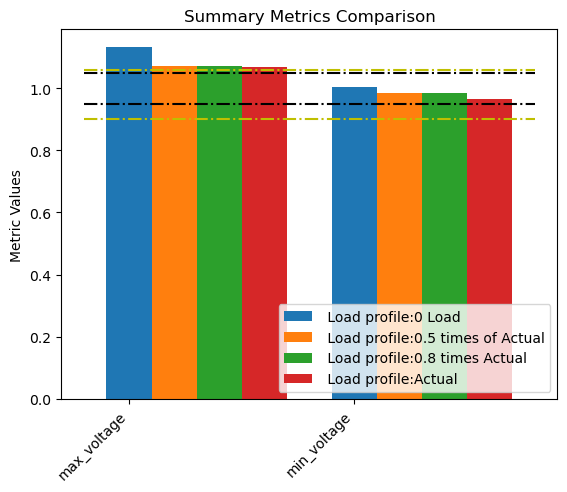

In [23]:
import json
import os
import matplotlib.pyplot as plt

# Function to extract specific keys from summary data for ANSI A and B
def extract_specific_keys(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)

    # Extract specific keys from "summary" data for ANSI A and B
    summary_ansi_a = {key: data["scenarios"]["pf1"]["primaries"]["summary"].get(key, None) for key in specific_keys}
    summary_ansi_b = {key: data["scenarios"]["pf1"]["secondaries"]["summary"].get(key, None) for key in specific_keys}

    return summary_ansi_a, summary_ansi_b

# List of your JSON files
path = "/Users/svijaysh/8500-feeder/summary_diff_loads/"
json_files = [f"{path}load_0.json", f"{path}load_05.json", f"{path}load_08.json", f"{path}smartds_example.json"]
json_files_ = ["0 Load", "0.5 times of Actual", "0.8 times Actual", "Actual"  ]

# Specific keys of interest
specific_keys = [
    'max_voltage',
    'min_voltage',
    # 'num_nodes_always_inside_ansi_a',
    # 'num_nodes_any_outside_ansi_a_always_inside_ansi_b',
    # 'num_nodes_any_outside_ansi_b',
    # 'num_time_points_with_ansi_b_violations'
]

# Extract specific keys for ANSI A and B from each file
summaries_ansi_a = []
summaries_ansi_b = []

for file_path in json_files:
    summary_a, summary_b = extract_specific_keys(file_path)
    summaries_ansi_a.append(summary_a)
    summaries_ansi_b.append(summary_b)

# Plotting a side-by-side bar chart for specific keys of interest
fig, ax = plt.subplots()
width = 0.2  # Width of the bars

# Extract keys for plotting
labels = specific_keys

# Position for ANSI A and B bars
x = range(len(labels))
for i, (summary_a, summary_b) in enumerate(zip(summaries_ansi_a, summaries_ansi_b)):
    #ax.bar([pos + i * width for pos in x], list(summary_a.values()), width, label=f'ANSI A - File {i+1}')
    ax.bar([pos + (i + 1) * width for pos in x], list(summary_b.values()), width, label=f' Load profile:{json_files_[i]}')
# Customize the plot as needed
ax.plot(0.95*np.ones(3), '-.', color = 'k')
ax.plot(1.05*np.ones(3), '-.', color = 'k')
ax.plot(0.9*np.ones(3), '-.', color = 'y')
ax.plot(1.058*np.ones(3), '-.', color = 'y')
# Customize the plot as needed
ax.set_ylabel("Metric Values")
ax.set_title("Summary Metrics Comparison")
ax.set_xticks([pos +1 * width for pos in x])
ax.set_xticklabels(labels)
ax.legend(loc = "lower right", )

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()



/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_69917/622754383.py:63: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


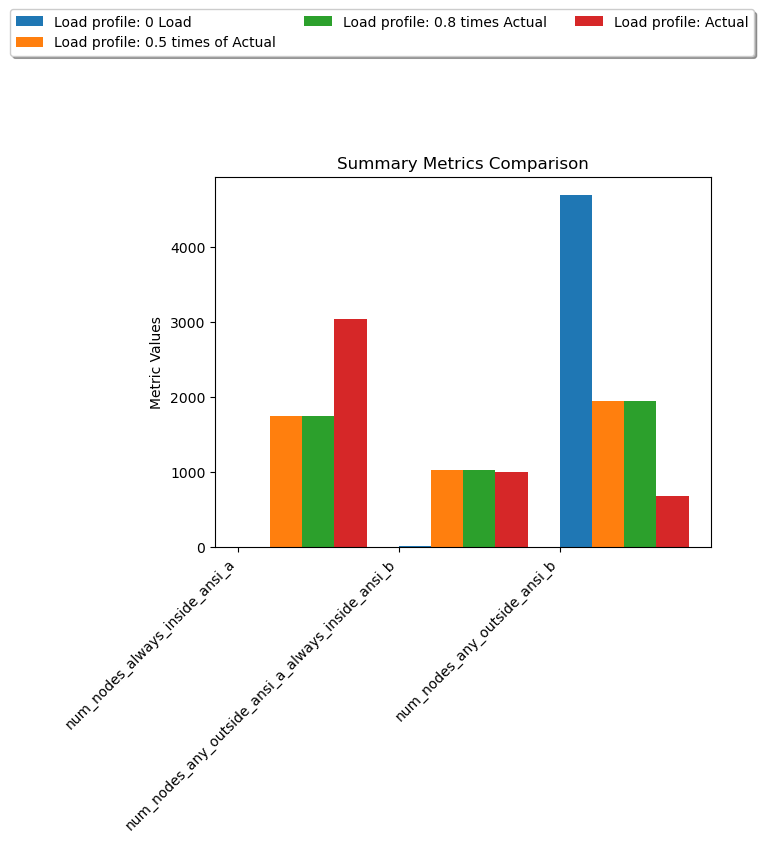

In [45]:
import json
import os
import matplotlib.pyplot as plt

# Function to extract specific keys from summary data for ANSI A and B
def extract_specific_keys(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)

    # Extract specific keys from "summary" data for ANSI A and B
    summary_ansi_a = {key: data["scenarios"]["pf1"]["primaries"]["summary"].get(key, None) for key in specific_keys}
    summary_ansi_b = {key: data["scenarios"]["pf1"]["secondaries"]["summary"].get(key, None) for key in specific_keys}

    return summary_ansi_a, summary_ansi_b

# List of your JSON files
path = "/Users/svijaysh/8500-feeder/summary_diff_loads/"
json_files = [f"{path}load_0.json", f"{path}load_05.json", f"{path}load_08.json", f"{path}smartds_example.json"]
json_files_ = ["0 Load", "0.5 times of Actual", "0.8 times Actual", "Actual"  ]

# Specific keys of interest
specific_keys = [
    'num_nodes_always_inside_ansi_a',
    'num_nodes_any_outside_ansi_a_always_inside_ansi_b',
    'num_nodes_any_outside_ansi_b',
]

# Extract specific keys for ANSI A and B from each file
summaries_ansi_a = []
summaries_ansi_b = []

for file_path in json_files:
    summary_a, summary_b = extract_specific_keys(file_path)
    summaries_ansi_a.append(summary_a)
    summaries_ansi_b.append(summary_b)

# Plotting a side-by-side bar chart for specific keys of interest
fig, ax = plt.subplots()
width = 0.2  # Width of the bars

# Extract keys for plotting
labels = specific_keys

# Position for ANSI A and B bars
x = range(len(labels))
for i, (summary_a, summary_b) in enumerate(zip(summaries_ansi_a, summaries_ansi_b)):
    ax.bar([pos + (i + 1) * width for pos in x], list(summary_b.values()), width, label=f'Load profile: {json_files_[i]}')

# Customize the plot as needed
ax.set_ylabel("Metric Values")
ax.set_title("Summary Metrics Comparison")
ax.set_xticks([pos + 0.5 * width for pos in x])
ax.set_xticklabels(labels)
ax.legend()
ax.legend(loc = "lower right",bbox_to_anchor=(1.1, 1.31),
          ncol=3, fancybox=True, shadow=True )


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()



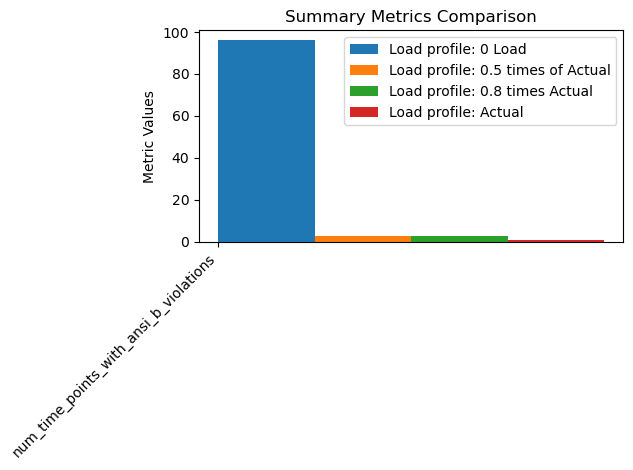

In [46]:


# Function to extract specific keys from summary data for ANSI A and B
def extract_specific_keys(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)

    # Extract specific keys from "summary" data for ANSI A and B
    summary_ansi_a = {key: data["scenarios"]["pf1"]["primaries"]["summary"].get(key, None) for key in specific_keys}
    summary_ansi_b = {key: data["scenarios"]["pf1"]["secondaries"]["summary"].get(key, None) for key in specific_keys}

    return summary_ansi_a, summary_ansi_b

# List of your JSON files
path = "/Users/svijaysh/8500-feeder/summary_diff_loads/"
json_files = [f"{path}load_0.json", f"{path}load_05.json", f"{path}load_08.json", f"{path}smartds_example.json"]
json_files_ = ["0 Load", "0.5 times of Actual", "0.8 times Actual", "Actual"  ]



# Specific keys of interest
specific_keys = [
   'num_time_points_with_ansi_b_violations'
]

# Extract specific keys for ANSI A and B from each file
summaries_ansi_a = []
summaries_ansi_b = []

for file_path in json_files:
    summary_a, summary_b = extract_specific_keys(file_path)
    summaries_ansi_a.append(summary_a)
    summaries_ansi_b.append(summary_b)

# Plotting a side-by-side bar chart for specific keys of interest
fig, ax = plt.subplots()
width = 0.3  # Width of the bars

# Extract keys for plotting
labels = specific_keys

# Position for ANSI A and B bars
x = range(len(labels))
for i, (summary_a, summary_b) in enumerate(zip(summaries_ansi_a, summaries_ansi_b)):
    ax.bar([pos + (i + 1) * width for pos in x], list(summary_b.values()), width, label=f'Load profile: {json_files_[i]}')

# Customize the plot as needed
ax.set_ylabel("Metric Values")
ax.set_title("Summary Metrics Comparison")
ax.set_xticks([pos + 0.5 * width for pos in x])
ax.set_xticklabels(labels)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

# Plot the time series load profiles. 
3 cases

    0.0
0   0.0
1   0.0
2   0.0
3   0.0
4   0.0
..  ...
90  0.0
91  0.0
92  0.0
93  0.0
94  0.0

[95 rows x 1 columns]
    0.2012578167289627
0             0.201385
1             0.201513
2             0.202019
3             0.202549
4             0.202859
..                 ...
90            0.199640
91            0.199668
92            0.199572
93            0.199408
94            0.199194

[95 rows x 1 columns]
    0.32201250676634036
0              0.322217
1              0.322420
2              0.323230
3              0.324079
4              0.324575
..                  ...
90             0.319424
91             0.319468
92             0.319315
93             0.319053
94             0.318711

[95 rows x 1 columns]
    0.4025156334579254
0             0.402771
1             0.403025
2             0.404037
3             0.405099
4             0.405718
..                 ...
90            0.399281
91            0.399335
92            0.399144
93            0.398816
94            0.39

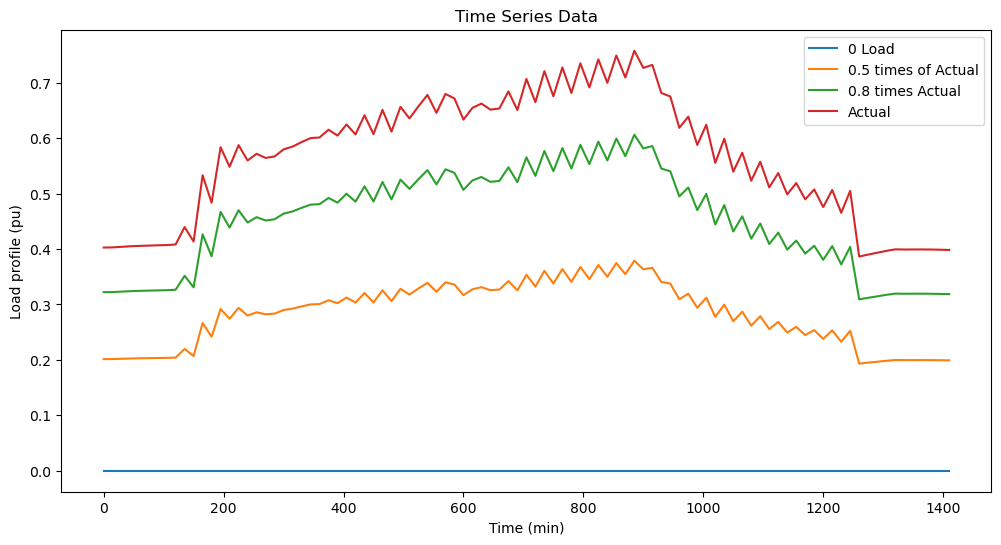

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
path = "/Users/svijaysh/8500-feeder/opendss-model-files/"
paths = [f"{path}load_0.csv", f"{path}load_scaled_05.csv", f"{path}load_scaled_08.csv", f"{path}smartdss_example.csv"]
n = ["0 Load", "0.5 times of Actual", "0.8 times Actual", "Actual"  ]

# Load the time series data
dataframes = [pd.read_csv(path) for path in paths]

# Plot the time series data
plt.figure(figsize=(12, 6))
for i, dataframe in enumerate(dataframes):
    print(dataframe)
    plt.plot(dataframe.index*15, dataframe, label=f"{n[i]}")

# Add labels and legend
plt.xlabel('Time (min)')
plt.ylabel('Load profile (pu)')
plt.title('Time Series Data')
plt.legend()
plt.show()


    0.0
0   0.0
1   0.0
2   0.0
3   0.0
4   0.0
..  ...
90  0.0
91  0.0
92  0.0
93  0.0
94  0.0

[95 rows x 1 columns]
           0
0   0.000000
1   0.062867
2   0.075010
3   0.107693
4   0.072699
..       ...
90  0.588729
91  0.563763
92  0.369818
93  0.359284
94  0.322745

[95 rows x 1 columns]
    0.4025156334579254
0             0.402771
1             0.403025
2             0.404037
3             0.405099
4             0.405718
..                 ...
90            0.399281
91            0.399335
92            0.399144
93            0.398816
94            0.398388

[95 rows x 1 columns]


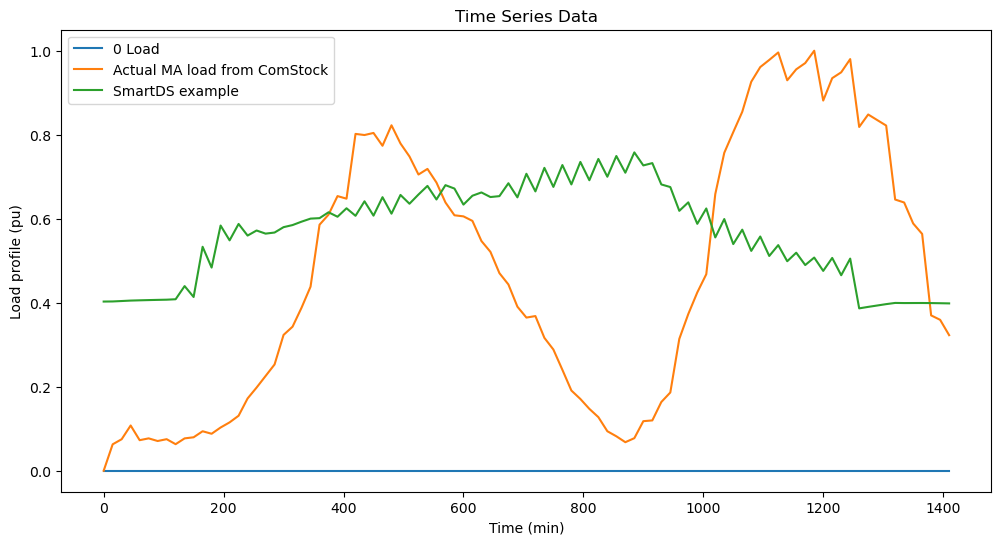

In [58]:
path = "/Users/svijaysh/8500-feeder/opendss-model-files/"
paths = [f"{path}load_0.csv", f"{path}normalized_total_electricity_MA.csv",  f"{path}smartdss_example.csv"]
n = ["0 Load", "Actual MA load from ComStock", "SmartDS example"  ]

# Load the time series data
dataframes = [pd.read_csv(path) for path in paths]

# Plot the time series data
plt.figure(figsize=(12, 6))
for i, dataframe in enumerate(dataframes):
    print(dataframe)
    plt.plot(dataframe.index*15, dataframe, label=f"{n[i]}")

# Add labels and legend
plt.xlabel('Time (min)')
plt.ylabel('Load profile (pu)')
plt.title('Time Series Data')
plt.legend()
plt.show()